<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">Lab2: การถดถอยเชิงเส้นพหุคูณ (Multiple Linear Regression)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1>

In [1]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt
# นำเข้าไลบรารี pandas โดยตั้งชื่อว่า pd
import pandas as pd
# นำเข้าไลบรารี seaborn โดยตั้งชื่อว่า sns
import seaborn as sns

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 นำข้อมูลเข้า</h1>

In [2]:
data = pd.read_csv('USA_Housing.csv') # อ่านไฟล์ csv ชื่อ 'USA_Housing.csv' เราจะได้ตารางของข้อมูล (dataframe) เก็บไว้ในตัวแปรชื่อ data
data.head() # แสดงผล dataframe 5 แถวแรก

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


<h1 style="font-size: 18px;">1.2 สำรวจข้อมูล</h1>

In [3]:
data.info() # แสดงรายละเอียดของแต่ละคอลัมน์ใน data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
data.describe().round(2) # แสดงสถิติเบื้องต้นของแต่ละคอลัมน์ใน dataframe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


In [5]:
# ตรวจสอบข้อมูลที่หายไป
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

<h1 style="font-size: 18px;">1.3 คัดเลือกข้อมูล (data cleaning)</h1>

In [6]:
data = data.drop('Address', axis=1) # ลบคอลัมน์ที่ชื่อ 'Address'
data.head() # แสดงผล dataframe 5 แถวแรก

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [7]:
data = data.round(2) # ปัดทศนิยมของค่าที่เป็นตัวเลขใน dataframe ให้เป็นทศนิยม 2 ตำแหน่ง
data.head() # แสดงผล dataframe 5 แถวแรก

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81
4,59982.20,5.04,7.84,4.23,26354.11,630943.49


<h1 style="font-size: 18px;">1.4 ดูความสัมพันธ์ของข้อมูล</h1>

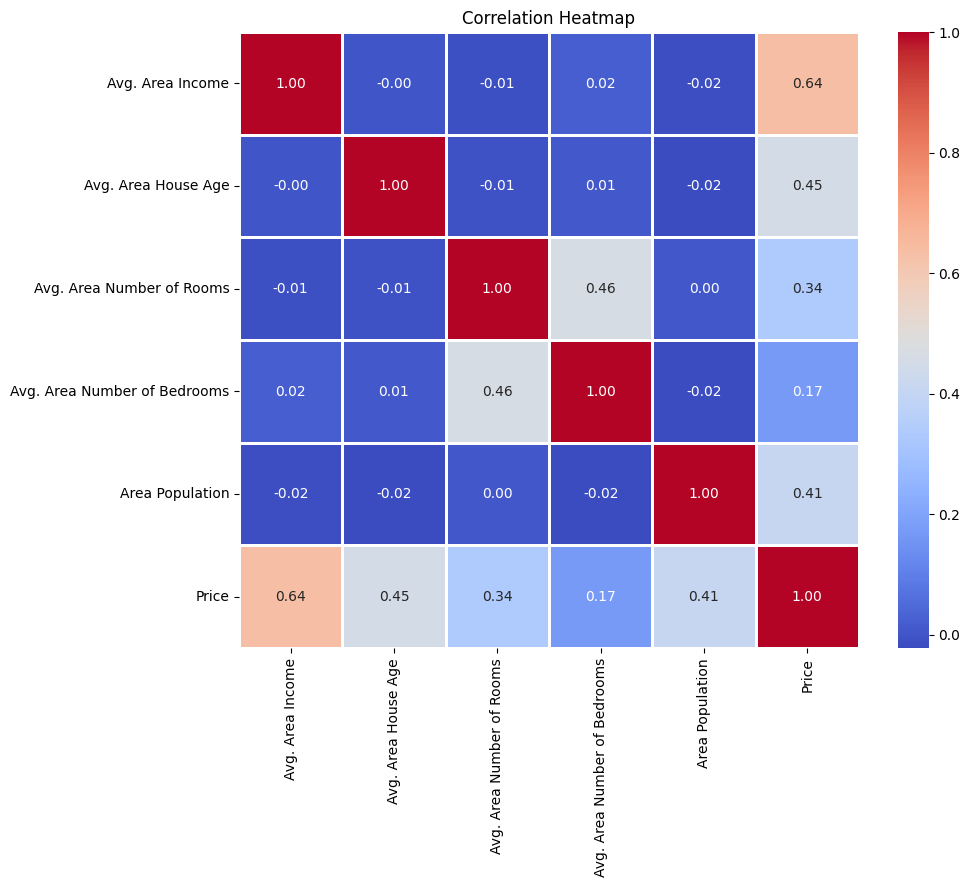

In [8]:
# สร้างกราฟ corelation ของแต่ละคอลัมน์ใน dataframe
corr_matrix = data.corr()  # เรียกดู correlation ของแต่ละคอลัมน์ใน dataframe
plt.figure(figsize=(10, 8)) # กำหนดขนาดของกราฟ
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2) # สร้างกราฟ correlation matrix 
plt.title('Correlation Heatmap') # ตั้งชื่อกราฟ
plt.show() # แสดงผล

In [9]:
data.corr().Price.sort_values(ascending=False) # แสดงผลคอลัมน์ที่มี correlation กับ 'Price' จากมากไปน้อย

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452575
Area Population                 0.408556
Avg. Area Number of Rooms       0.335651
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

<h1 style="font-size: 18px;">1.5 ดูการกระจายตัวของข้อมูล</h1>

<AxesSubplot: xlabel='Price', ylabel='Count'>

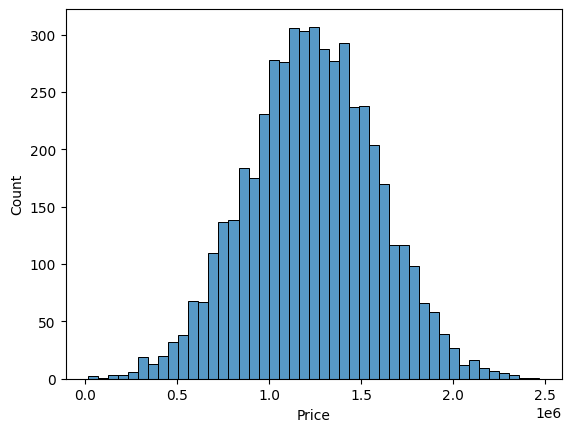

In [10]:
sns.histplot(data.Price) # แสดงผลการกระจายตัวของข้อมูล 'Price'

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. ปรับช่วงของข้อมูล (Feature Scaling)</h1>

In [11]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ StandardScaler
from sklearn.preprocessing import StandardScaler
# นำฟังก์ชัน StandardScaler() เก็บไว้ในตัวแปร pre_process
pre_process = StandardScaler()

<h1 style="font-size: 18px;">2.1 แบ่งข้อมูลเป็นส่วน Features และ Label</h1>

In [12]:
# X เป็น Features
X = data.drop('Price', axis=1)
# y เป็น Label
y = data['Price']

<h1 style="font-size: 18px;">2.2 ทำการ Standardize ข้อมูลส่วน Features</h1>


In [13]:
X = pd.DataFrame(pre_process.fit_transform(X)) # ปรับช่วงของ Features ทั้งหมด
X.head() # แสดงผล dataframe 5 แถวแรก

,0,1,2,3,4
0,1.028660,-0.299875,0.022104,0.088062,-1.317599
1,1.000808,0.022921,-0.256309,-0.722301,0.403999
2,-0.684629,-0.108215,1.513605,0.930840,0.072410
3,-0.491499,1.223318,-1.389850,-0.584540,-0.186735
4,-0.807072,-0.945467,0.847401,0.201513,-0.988387


In [14]:
print(type(X)) ; print(type(y)) # แสดง type ของ X และ y ในตอนนี้

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [15]:
X = np.array(X)  # เปลี่ยน type ของ X ให้เป็น array
y = np.array(y)  # เปลี่ยน type ของ y ให้เป็น array
print(type(X)) ; print(type(y)) # แสดง type ของ X และ y ในตอนนี้

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. แบ่งส่วนข้อมูล (Train-Test Split)</h1>

In [16]:
# นำเข้าไลบรารี sklearn.model_selection เพื่อเรียกใช้ train_test_split
from sklearn.model_selection import train_test_split

In [17]:
# แบ่งส่วนข้อมูล X เป็น X_train, X_test และ y เป็น y_train, y_test โดยมีอัตราส่วนแบ่งเป็น 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [18]:
print('length of X_train:',len(X_train),', length of X_test:', len(X_test)) # แสดงจำนวนข้อมูลใน X_train และ X_test

length of X_train: 3500 , length of X_test: 1500


In [19]:
# หรืออีกวิธีหนึ่ง เราสามารถดู shape ของข้อมูลที่เราแบ่งได้ โดยใช้คำสั่ง .shape 
print('shape of X_train:', X_train.shape)   # ดู shape ของ X_train
print('shape of X_test:', X_test.shape)     # ดู shape ของ X_test
print('shape of y_train:', y_train.shape)   # ดู shape ของ y_train
print('shape of y_test:', y_test.shape)     # ดู shape ของ y_test

shape of X_train: (3500, 5)
shape of X_test: (1500, 5)
shape of y_train: (3500,)
shape of y_test: (1500,)


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">4. Multiple Linear Regression model</h1>

<h1 style=" font-size: 18px;"">4.1 สมการทั่วไปของ Linear Regression:</h1>

$$Y \approx w_1 \cdot X_1 + w_2 \cdot X_2 + \dots + w_n \cdot X_n + b$$

โดยที่:
- $Y$ คือตัวแปรตาม (Dependent Variable) ซึ่งเป็นผลลัพธ์หรือค่าที่เราต้องการทำนายหรือวัด
- $X_1, X_2, ... , X_n $ คือตัวแปรอิสระ (Independent Variable) ตัวที่ 1 ถึง n ซึ่งเป็นข้อมูลหรือตัวแปรที่มีผลต่อ $Y$ และที่เราใช้ในการทำนายหรือวัด $Y$
- $w_1, w_2, ... , w_n$ หรืออาจเรียกว่า weight คือพารามิเตอร์หรือความชัน (Coefficient) ของ X ตัวที่ 1 ถึง n ซึ่งแสดงถึงความสัมพันธ์ระหว่าง $X$ และ $Y$ และบ่งบอกว่าการเปลี่ยนแปลงใน $X$ มีผลต่อ $Y$ อย่างไร
- $b$ หรืออาจเรียกว่า bias คือค่าคงที่ (Intercept) ซึ่งคือค่าของ $Y$ เมื่อ $X$ มีค่าเป็นศูนย์ หรือค่าตัดแกน $Y$ ที่ $X$ เท่ากับศูนย์

<h1 style=" font-size: 18px;"">4.2 Gradient Descent ใน Multiple Linear Regression</h1>

เช่นเดิม ค่า Cost ที่เรานั้นใช้ในการวัดผลยังเป็น Mean Square Error (MSE) อยู่ ซึ่งสมการในรูปแบบทั่วไปจะเป็นดังนี้:

$$ J(w,b) = \text{MSE} = \frac{1}{2m} \sum_{i=0}^{m-1} \left( \hat{Y}_i - Y_i \right)^2 $$

เมื่อ:
- $m$ คือจำนวนตัวอย่างในชุดข้อมูล
- $Y_i$ คือค่าจริงที่ต้องการทำนาย
- $\hat{Y}_i$ คือค่าที่ได้จากการทำนายด้วยโมเดล ซึ่งสามารถเขียนได้เป็น

$$ \hat{Y}_i = w_1 X_{i1} + w_2 X_{i2} + \dots + w_n X_{in} + b $$

โดยที่:
- $ X_{i1}, X_{i2}, \dots, X_{in} $ เป็นค่าตัวแปรต้นของตัวอย่างที่ $ i $
- $ w_0, w_1, \dots, w_n $ เป็น coefficients ของโมเดล
- $ b $ คือค่าคงที่ (Intercept)

การทำ Gradient Desccent คือการอัพเดท $ w_1, \dots, w_n $ และ $ b $ ให้มีค่าเหมาะสมกับชุดข้อมูลมากที่สุด สามารถทำได้ด้วยสมการดังนี้

ทำซ้ำจนกว่าจะลู่เข้า:
$$
\begin{align*}
w_1 &:= w_1 - \alpha \frac{\partial J(w_1,b)}{\partial w_1} \\
w_2 &:= w_2 - \alpha \frac{\partial J(w_2,b)}{\partial w_2} \\
\vdots \\
w_n &:= w_n - \alpha \frac{\partial J(w_n,b)}{\partial w_n} \\
b &:= b - \alpha \frac{\partial J(w,b)}{\partial b} \\
\end{align*}
$$

โดยมีสมการ gradient สำหรับ $ w_1 $ และ $ w_2 $ ดังนี้:

$$
\frac{\partial \text{J(w,b)}}{\partial w_1} = \frac{1}{m} \sum_{i=0}^{m-1} X_{i1} \left( \left(w_1 X_{i1} + w_2 X_{i2} + \dots + w_n X_{in} + b \right) - Y_i \right)
$$

$$
\frac{\partial \text{J(w,b)}}{\partial w_2} = \frac{1}{m} \sum_{i=0}^{m-1} X_{i2} \left( \left(w_1 X_{i1} + w_2 X_{i2} + \dots + w_n X_{in} + b\right) - Y_i \right)
$$

และเราสามารถคำนวณ gradient สำหรับ $ w_3, \dots, w_n $ ได้เช่นกัน

และมีสมการ gradient สำหรับ $ b $ ดังนี้:

$$
\frac{\partial \text{J(w,b)}}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left( \left(w_1 X_{i1} + w_2 X_{i2} + \dots + w_n X_{in} + b \right) - Y_i \right)
$$


In [20]:
learning_rate = 0.01 # กำหนดค่า learning rate เก็บไว้ในตัวแปร alpha
num_iterations = 1000 # กำหนดจำนวนครั้งในการทำ Gradient Descent เก็บไว้ในตัวแปร num_iterations
num_features = X_train.shape[1] # กำหนดจำนวน Features เก็บไว้ในตัวแปร num_features
m = len(X_train)  # กำหนดจำนวนข้อมูล เก็บไว้ในตัวแปร m
w = np.zeros(num_features) # กำหนดค่าเริ่มต้นของ weights โดยจะให้เป็น 0 ในทุกฟีเจอร์ก่อน
b = 0 # กำหนดค่าเริ่มต้นของ bias โดยจะให้เป็น 0

# Gradient descent
for iteration in range(num_iterations):
    # คำนวณค่าทำนาย
    y_pred = np.dot(X_train, w) + b

    # คำนวณ gradients
    gradient = (1.0 / len(y_train)) * np.dot(X_train.T, (y_pred - y_train))

    # อัพเดทค่า w และ b
    w -= learning_rate * gradient
    b -= learning_rate * np.mean(y_pred - y_train)

    # คำนวณค่า Cost ใหม่
    mse = (1 / (2 * m)) * ((y_pred - y_train) ** 2).sum()
    w_str = ", ".join([f"{weight:.2f}" for weight in w])
    print(f"รอบที่ {iteration + 1}: w = [{w_str}], b = {b:.2f}, MSE = {mse:.2f}")

print()
# หลังจากทำ Gradient Descent ครบทุก iterations แล้ว ให้สรุปผล w,b สุดท้าย
print("ค่า w สุดท้าย:", w, ', ค่า b สุดท้าย:', b, ', ค่า MSE สุดท้าย:', mse)

รอบที่ 1: w = [2329.57, 1572.47, 1176.41, 670.95, 1295.11], b = 12282.19, MSE = 817996406126.46
รอบที่ 2: w = [4635.35, 3129.86, 2338.35, 1328.97, 2579.50], b = 24441.82, MSE = 801851287814.33
รอบที่ 3: w = [6917.59, 4672.32, 3486.02, 1974.26, 3853.26], b = 36480.12, MSE = 786027719616.84
รอบที่ 4: w = [9176.53, 6199.99, 4619.63, 2607.03, 5116.46], b = 48398.28, MSE = 770519277386.65
รอบที่ 5: w = [11412.41, 7713.02, 5739.35, 3227.46, 6369.19], b = 60197.52, MSE = 755319665839.77
รอบที่ 6: w = [13625.47, 9211.54, 6845.40, 3835.77, 7611.53], b = 71879.02, MSE = 740422715956.54
รอบที่ 7: w = [15815.94, 10695.69, 7937.95, 4432.13, 8843.57], b = 83443.96, MSE = 725822382435.55
รอบที่ 8: w = [17984.06, 12165.61, 9017.20, 5016.74, 10065.38], b = 94893.49, MSE = 711512741199.09
รอบที่ 9: w = [20130.05, 13621.45, 10083.33, 5589.78, 11277.04], b = 106228.77, MSE = 697487986949.44
รอบที่ 10: w = [22254.15, 15063.32, 11136.51, 6151.44, 12478.64], b = 117450.95, MSE = 683742430774.68
รอบที่ 11: w 


รอบที่ 70: w = [116994.33, 80447.75, 56176.29, 24564.76, 68859.20], b = 620867.32, MSE = 209272659619.24
รอบที่ 71: w = [118132.68, 81248.77, 56698.12, 24690.15, 69577.10], b = 626954.64, MSE = 205232704566.97
รอบที่ 72: w = [119259.48, 82042.11, 57214.37, 24811.46, 70288.89], b = 632981.23, MSE = 201272910696.42
รอบที่ 73: w = [120374.85, 82827.84, 57725.11, 24928.78, 70994.63], b = 638947.70, MSE = 197391683721.87
รอบที่ 74: w = [121478.90, 83606.03, 58230.40, 25042.16, 71694.37], b = 644854.64, MSE = 193587461147.36
รอบที่ 75: w = [122571.76, 84376.76, 58730.32, 25151.69, 72388.15], b = 650702.65, MSE = 189858711630.67
รอบที่ 76: w = [123653.54, 85140.10, 59224.93, 25257.41, 73076.02], b = 656492.32, MSE = 186203934360.23
รอบที่ 77: w = [124724.35, 85896.12, 59714.31, 25359.42, 73758.04], b = 662224.23, MSE = 182621658444.45
รอบที่ 78: w = [125784.30, 86644.89, 60198.53, 25457.75, 74434.25], b = 667898.95, MSE = 179110442313.38
รอบที่ 79: w = [126833.51, 87386.47, 60677.65, 25552.4

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">5. การใช้ Multiple Linear Regression model ด้วย Scikit-Learn Library</h1>

In [21]:
# นำเข้าไลบรารี sklearn.linear_model เพื่อเรียกใช้ Linear Regression Model
from sklearn.linear_model import LinearRegression 

<h1 style="font-size: 18px;">5.1 สร้างโมเดลและเทรนโมเดล</h1>

In [22]:
model = LinearRegression() # สร้างโมเดล Linear Regression โดยเก็บไว้ที่ตัวแปร model

model.fit(X_train, y_train) # เทรนโมเดล หรือ ให้โมเดลเรียนรู้ชุดข้อมูลที่เราป้อนให้ นั่นคือ X_train และ y_train

LinearRegression()

In [23]:
model.coef_ # ค่า w ของ Feature ที่ 1,2,3,4 และ 5 ที่ได้จากการเทรนโมเดล

array([230470.22464993, 164166.94007337, 120491.50864755,   2925.05583818,
       151006.61820119])

In [24]:
model.intercept_ # ค่า b ที่ได้จากการเทรนโมเดล

1231274.9350006236

<h1 style="font-size: 18px;"">5.2 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [25]:
y_pred = model.predict(X_test) # ให้โมเดลทำนายราคาบ้าน โดยพิจารณาจาก Features ทุกตัวที่ป้อนให้
print(y_pred)

[1308854.79567395 1236376.85319265 1244343.10994072 ... 1456879.32259876
 1484041.09226635 1048009.51365317]


In [26]:
# เปลี่ยน X_test, y_test และ y_pred เป็น dataframes
X_test_df = pd.DataFrame(X_test, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5'])  # Replace with actual feature names
y_test_df = pd.DataFrame(y_test, columns=['Actual'])
y_pred_df = pd.DataFrame(y_pred.round(2), columns=['Predicted'])

# รวมทั้ง 3 dataframes เป็น dataframe เดียวกัน
result = pd.concat([X_test_df,y_test_df,y_pred_df],axis=1)
result

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Actual,Predicted
0,-0.626402,1.051833,-0.544666,-0.592643,0.772363,1339096.08,1308854.80
1,-1.071877,0.920697,-0.067386,-0.689887,0.735908,1251794.18,1236376.85
2,0.150859,0.779474,-0.325913,-1.597494,-0.700112,1340094.97,1244343.11
3,0.068846,0.325542,0.877231,0.242031,-1.180424,1431507.62,1228740.16
4,0.413663,-2.589710,-0.494950,-1.216623,1.457278,1042373.52,1058329.85
...,...,...,...,...,...,...,...
1495,0.527827,0.285192,1.672698,-0.487296,-1.073707,1348221.77,1437726.10
1496,0.237333,-0.370487,0.429781,0.225824,-1.212042,1309937.40,1094570.48
1497,-0.461458,0.759299,0.738024,-0.446778,0.792588,1472887.25,1456879.32
1498,-1.173811,0.607988,-0.027613,0.339275,2.819862,1409762.12,1484041.09


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">6. การวัดผลโมเดล (Model Evaluation)</h1>

<h1 style="font-size: 18px; font-weight: bold;">6.1 Mean Squared Error (MSE) - ค่าเฉลี่ยความคลาดเคลื่อนกำลังสอง</h1>

- คือการคำนวณค่าเฉลี่ยของความคลาดเคลื่อนกำลังสองระหว่างค่าที่ทำนายได้และค่าจริง
- ค่า MSE ที่สูงบ่งบอกว่ามีความคลาดเคลื่อนในการทำนายที่มาก
- สูตร: 
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2$$


<h1 style="font-size: 18px; font-weight: bold;">6.2 Mean Absolute Error (MAE) - ค่าเฉลี่ยของความคลาดเคลื่อนแบบสัมบูรณ์</h1>

- คือการคำนวณค่าเฉลี่ยของความคลาดเคลื่อนแบบสัมบูรณ์ระหว่างค่าที่ทำนายได้และค่าจริง
- ค่า MAE ที่สูงบ่งบอกว่ามีความคลาดเคลื่อนในการทำนายที่มาก แต่ต่างจาก MSE ตรงที่ค่าที่ออกมาจะเป็นค่าคลาดเคลื่อนที่แท้จริง
- สูตร: 
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{true},i} - y_{\text{pred},i}|$$

<h1 style="font-size: 18px; font-weight: bold;">6.3 Mean Absolute Percentage Error (MAPE) - ค่าเฉลี่ยของความคลาดเคลื่อนแบบสัมบูรณ์เป็นเปอร์เซ็นต์</h1>

- คือการคำนวณความคลาดเคลื่อนเป็นเปอร์เซ็นต์ระหว่างค่าที่ทำนายได้และค่าจริง
- ใช้ในกรณีที่ต้องการเปรียบเทียบความคลาดเคลื่อนระหว่างชุดข้อมูลที่มีหน่วยหรือขนาดแตกต่างกัน
- สูตร:
$$\text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_{\text{true},i} - y_{\text{pred},i}}{y_{\text{true},i}} \right|$$

<h1 style="font-size: 18px; font-weight: bold;">6.4 R-squared (R2) score - ค่า R กำลังสอง</h1>

- บ่งบอกถึงสัดส่วนของการแปรผันของตัวแปรตามที่ถูกอธิบายโดยโมเดล
- ค่า R2 ใกล้ 1 บ่งบอกว่าโมเดลมีประสิทธิภาพในการทำนาย ในขณะที่ค่า R2 ใกล้ 0 บ่งบอกว่าโมเดลไม่มีประสิทธิภาพ
- สูตร:
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2}{\sum_{i=1}^{n} (y_{\text{true},i} - \bar{y_{\text{true}}})^2}$$


In [27]:
# นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
# คำนวณ Mean Squared Error (MSE)
mse = mean_squared_error(result['Actual'], result['Predicted'])

# คำนวณ Mean Absolute Error (MAE)
mae = mean_absolute_error(result['Actual'], result['Predicted'])

# คำนวณ Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((result['Actual'] - result['Predicted']) / result['Actual'])) * 100

# คำนวณ R-squared (R2) score
r2 = r2_score(result['Actual'], result['Predicted'])

# แสดงผล
print("Mean Squared Error (MSE):", mse.round(2))
print("Mean Absolute Error (MAE):", mae.round(2))
print("Mean Absolute Percentage Error (MAPE):", mape.round(2))
print("R-squared (R2) Score:", r2.round(2))

Mean Squared Error (MSE): 10072375937.59
Mean Absolute Error (MAE): 81144.15
Mean Absolute Percentage Error (MAPE): 7.34
R-squared (R2) Score: 0.91
